Epoch 1/25
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.1899 - loss: 2.2481 - val_accuracy: 0.4446 - val_loss: 1.6386
Epoch 2/25
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 31s 27ms/step - accuracy: 0.5099 - loss: 1.4661 - val_accuracy: 0.5906 - val_loss: 1.3086
Epoch 3/25
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - accuracy: 0.6374 - loss: 1.1546 - val_accuracy: 0.6590 - val_loss: 1.1347
Epoch 4/25
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - accuracy: 0.6871 - loss: 1.0088 - val_accuracy: 0.6864 - val_loss: 1.0374
Epoch 5/25
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - accuracy: 0.7178 - loss: 0.9164 - val_accuracy: 0.6756 - val_loss: 1.0667
Epoch 6/25
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.7319 - loss: 0.8712 - val_accuracy: 0.6935 - val_loss: 1.0155
Epoch 7/25
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 33s 29ms/step - accuracy: 0.7455 - loss: 0.8280 - val_accuracy: 0.7280 - val_loss: 0.9099
Epoch 8/25
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - accuracy: 0.7572 -

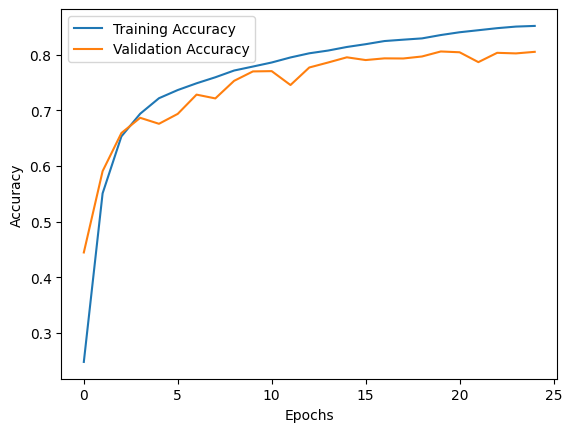

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Load the SVHN dataset from TensorFlow Datasets
ds_train, ds_info_train = tfds.load('svhn_cropped', split='train', as_supervised=True, with_info=True)
ds_test, ds_info_test = tfds.load('svhn_cropped', split='test', as_supervised=True, with_info=True)

# Define preprocessing functions
def preprocess_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return image, tf.one_hot(label, 10)  # One-hot encode the labels

# Apply preprocessing to the datasets
ds_train = ds_train.map(preprocess_img).cache().shuffle(10000).batch(64).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess_img).batch(64).prefetch(tf.data.experimental.AUTOTUNE)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

# Train the model and save the training history
history = model.fit(ds_train, epochs=25, validation_data=ds_test)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(ds_test)
print('Test accuracy:', test_accuracy * 100)

# Plot the training and validation accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Display the accuracy plot
plot_accuracy(history)
